# Airfoil Self-Noise Data Set

In [88]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [89]:
# Import Data
df = pd.read_csv('./AirfoilSelfNoise.csv')

# Check Data
df.shape

(1503, 6)

In [90]:
# EDA
df.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [91]:
# Check for null values
df.isnull().sum()

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

In [92]:
# Check for duplicates
df.duplicated().sum()

0

In [93]:
# Check for outliers
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [94]:
# Check for correlation
df.corr()

,f,alpha,c,U_infinity,delta,SSPL
f,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
alpha,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
c,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
U_infinity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
delta,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SSPL,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


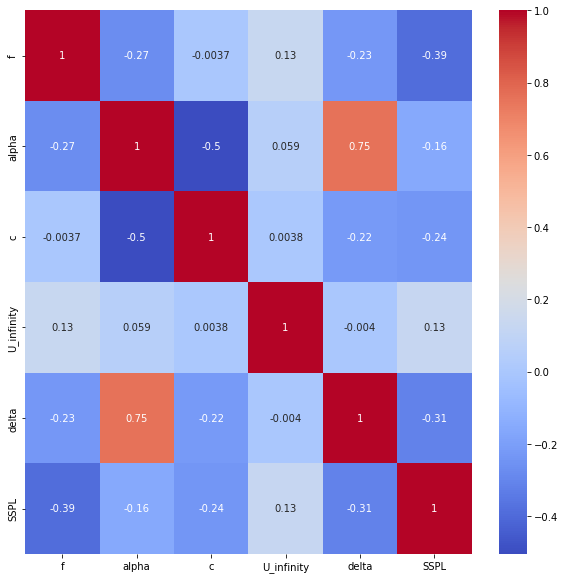

In [95]:
# Visualize correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Figure size 720x720 with 0 Axes>

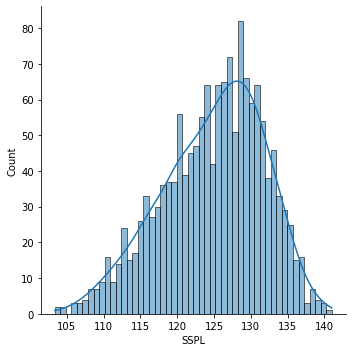

In [96]:
# Visualize distribution
plt.figure(figsize=(10,10))
sns.displot(df['SSPL'], bins=50, kde=True)
plt.show()


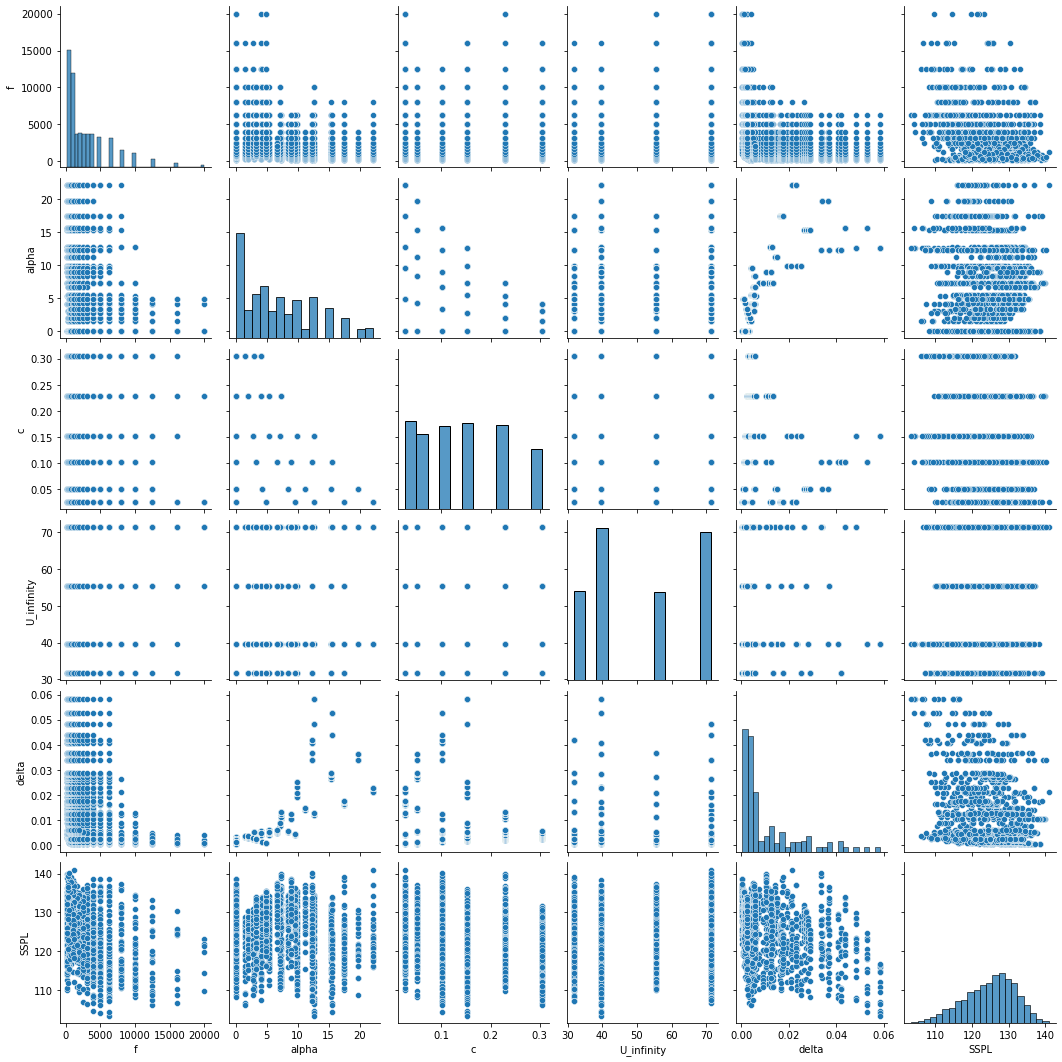

In [97]:
# Create a pairplot
sns.pairplot(df)
plt.show()

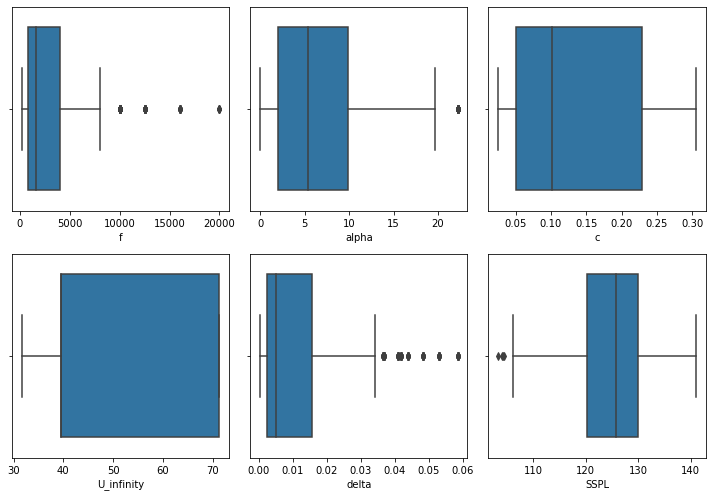

In [98]:
# Boxplot features
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
plt.show()


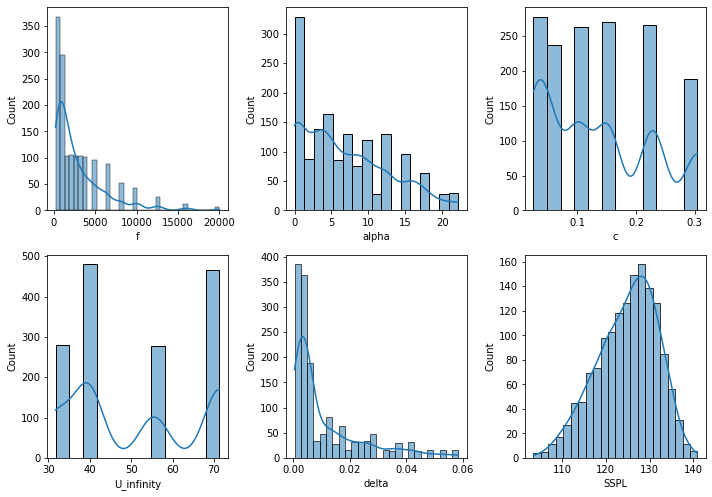

In [99]:
# Find subgroups in each feature
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
plt.show()


In [100]:
# Group by design (c and )
df_grouped = df.groupby(['c'])

# Display grouped dataframe
df_grouped.head()


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
188,1250,0.0,0.2286,71.3,0.002143,128.144
189,1600,0.0,0.2286,71.3,0.002143,129.134
190,2000,0.0,0.2286,71.3,0.002143,128.244
191,2500,0.0,0.2286,71.3,0.002143,128.354
192,3150,0.0,0.2286,71.3,0.002143,127.834


In [101]:
# TODO:
# Look into different grouping

# Data Prep

In [102]:
# Set up X and y
X = df.drop('SSPL', axis=1)
y = df['SSPL']

In [103]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [104]:
# Create a baseline model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Check the score
print('Baseline Score: ', lr.score(X_test, y_test))

Baseline Score:  0.5176791191045547


In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression()) 
])

# Parameter grid for GridSearchCV
param_grid = [
    {
        'regressor': [LinearRegression()],
    },
    {
        'regressor': [DecisionTreeRegressor()],
        'regressor__max_depth': [None, 10, 30, 50],
        'regressor__min_samples_leaf': [1, 2, 4]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__learning_rate': [0.01, 0.1, 1],
        'regressor__n_estimators': [100, 150, 200]
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 150, 200],
        'regressor__max_depth': [None, 10, 30, 50],
        'regressor__min_samples_leaf': [1, 2, 4]
    }
]

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit and predict
grid_search.fit(X_train, y_train)
labels_pred = grid_search.predict( X_test )

# Evaluation
mse = mean_squared_error(y_test, labels_pred)
print('Mean Squared Error:', mse)
print('Best parameters:', grid_search.best_params_)

# The best fitted model
best_model = grid_search.best_estimator_

Mean Squared Error: 3.21264400244763
Best parameters: {'regressor': RandomForestRegressor(max_depth=30, n_estimators=150), 'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 150}


In [106]:
# Print the best model, its parameters, and its score
print(best_model)
print("Score:" , grid_search.best_score_)
print("Best parameters:" , grid_search.best_params_)
print("Best estimator:" , grid_search.best_estimator_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=30, n_estimators=150))])
Score: -3.8097010223372285
Best parameters: {'regressor': RandomForestRegressor(max_depth=30, n_estimators=150), 'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 150}
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=30, n_estimators=150))])


In [107]:
importance = best_model.steps[1][1].feature_importances_

for i, j in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {j}')


Feature: f, Score: 0.41519022814429307
Feature: alpha, Score: 0.044791941668836356
Feature: c, Score: 0.09212422447550421
Feature: U_infinity, Score: 0.04090494298081308
Feature: delta, Score: 0.40698866273055334


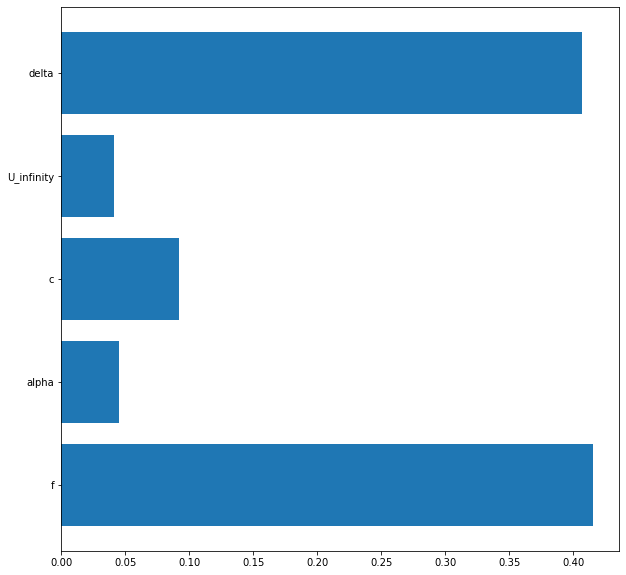

In [108]:
# Plot feature importance
plt.figure(figsize=(10,10))
plt.barh(X.columns, importance)
plt.show()

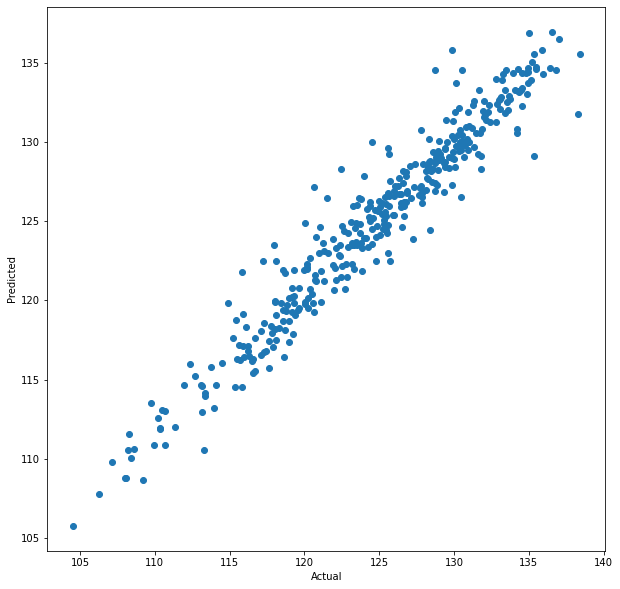

In [109]:
# Plot the residuals
plt.figure(figsize=(10,10))
plt.scatter(y_test, labels_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()